<a href="https://colab.research.google.com/github/tanmai-tallam/Laptop-Price-Prediction/blob/main/2023_11_05_Laptop_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 131543: invalid continuation byte

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Adverk/Adverk AI 2023 10 Batch/DataSets/laptop_price.csv",encoding="latin")
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [ ]:
df.drop(columns=['laptop_ID'],inplace=True)

In [ ]:
df.isnull().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [ ]:
df.duplicated().sum()

28

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df['Price_euros']

0       1339.69
1        898.94
2        575.00
3       2537.45
4       1803.60
         ...   
1270     638.00
1271    1499.00
1272     229.00
1273     764.00
1274     369.00
Name: Price_euros, Length: 1275, dtype: float64

In [ ]:
df['Price']=round(df['Price_euros']*89.2834).astype('int')

In [ ]:
df.sample(3)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Price
290,Acer,Chromebook C910-C2ST,Notebook,15.6,1366x768,Intel Celeron Dual Core 3205U 1.5GHz,2GB,16GB SSD,Intel HD Graphics,Chrome OS,2.19kg,199.00,17767
591,Lenovo,IdeaPad 320-15ABR,Notebook,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,12GB,512GB SSD,AMD Radeon 530,Windows 10,2.2kg,949.00,84730
80,Dell,Latitude 5590,Ultrabook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.88kg,1096.16,97869


In [ ]:
df.drop(columns=['Price_euros'],inplace=True)

In [ ]:
df.sample(3)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
826,Asus,ZenBook Flip,2 in 1 Convertible,13.3,Touchscreen / Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.1kg,121247
1141,MSI,GP62M 7RDX,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.4kg,102033
87,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.96kg,53480


In [ ]:
# EDA : Exploratory Data Analysis
# 1.Univariate Data Analysis
# 2.Bivariate Analysis (wrt Price column)

In [ ]:
# Company

In [ ]:
df['Company'].value_counts()

Dell         291
Lenovo       289
HP           268
Asus         152
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

In [ ]:
9+7+7+6+4+4+3+3+3+3+2

51

In [ ]:
51/1303

0.039140445126630855

<Axes: >

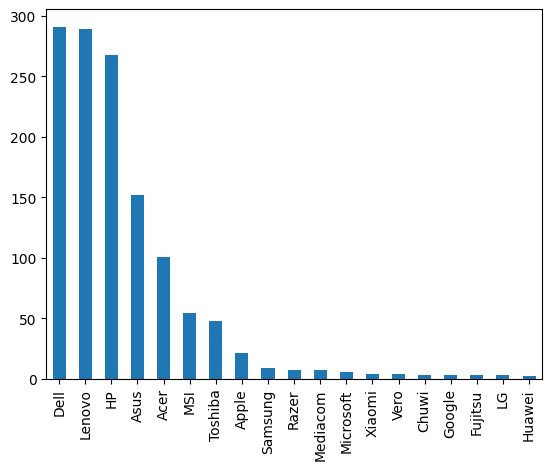

In [ ]:
df['Company'].value_counts().plot(kind='bar')

<Axes: >

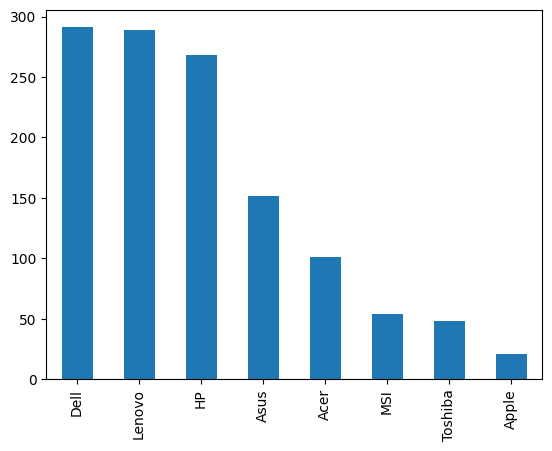

In [ ]:
df['Company'].value_counts()[0:8].plot(kind='bar')

In [ ]:
df=df[df.groupby('Company')['Company'].transform('count')>10]

In [ ]:
df

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,119612
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,80260
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,51338
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,226552
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,161032
...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,56963
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,133836
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,20446
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,68213


In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
df['Company'].value_counts()

Dell       291
Lenovo     289
HP         268
Asus       152
Acer       101
MSI         54
Toshiba     48
Apple       21
Name: Company, dtype: int64

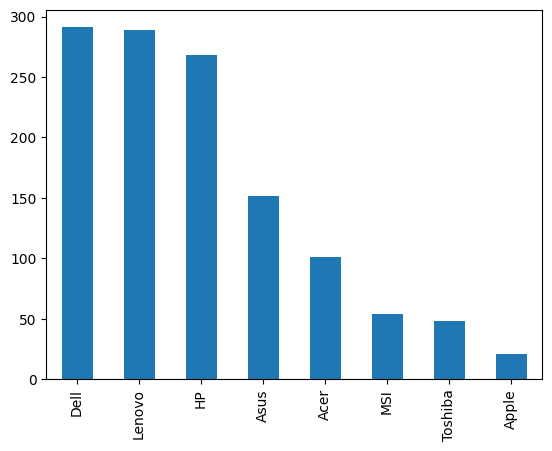

In [ ]:
df['Company'].value_counts().plot(kind='bar')
plt.show()

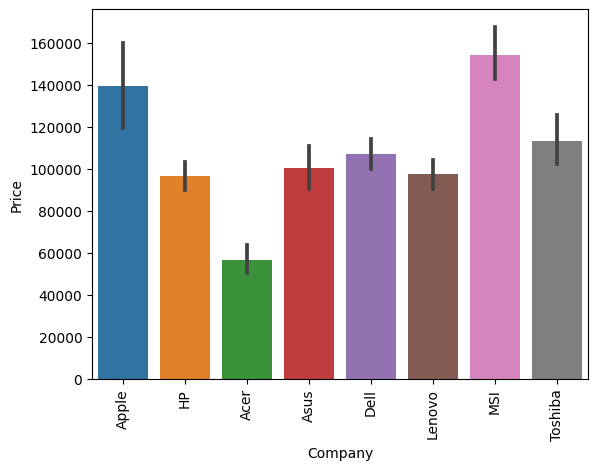

In [ ]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['Product'].value_counts()

XPS 13                                 30
Inspiron 3567                          25
250 G6                                 21
Legion Y520-15IKBN                     19
Vostro 3568                            19
                                       ..
Ideapad 520-15IKBR                      1
Thinkpad X260                           1
Rog G752VL-UH71T                        1
Portege X30-D-10L                       1
X553SA-XX031T (N3050/4GB/500GB/W10)     1
Name: Product, Length: 589, dtype: int64

In [ ]:
df.drop(columns=['Product'],inplace=True)

<ipython-input-28-4bcf6fa0a033>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Product'],inplace=True)


In [ ]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1163,Dell,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.191kg,89194


In [ ]:
# TypeName
df['TypeName'].value_counts()

Notebook              688
Gaming                200
Ultrabook             171
2 in 1 Convertible    114
Workstation            29
Netbook                22
Name: TypeName, dtype: int64

<Axes: >

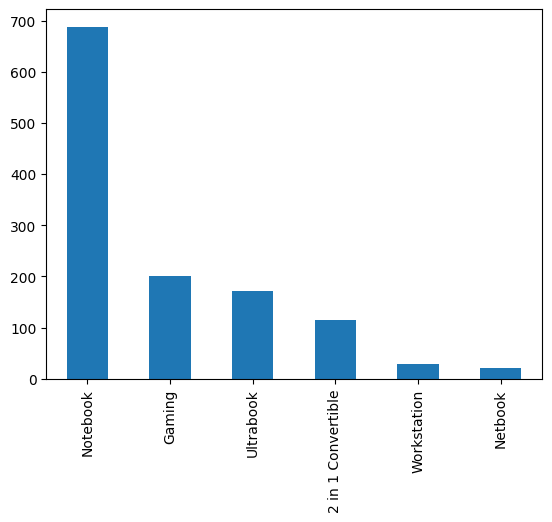

In [ ]:
df['TypeName'].value_counts().plot(kind='bar')

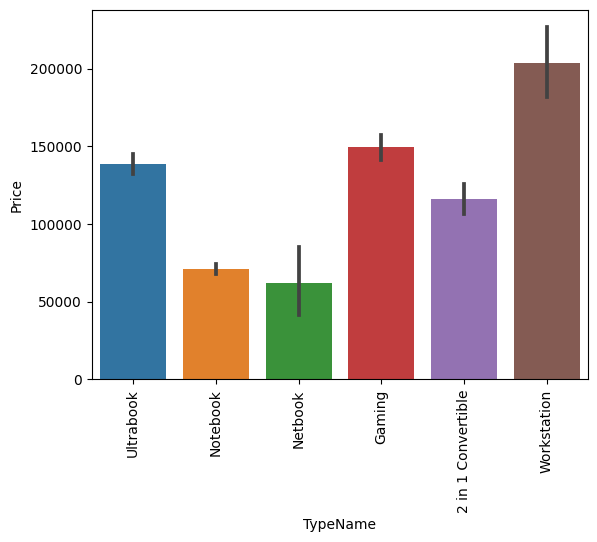

In [ ]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
132,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.63kg,88212


In [ ]:
df['Inches'].value_counts()

15.6    637
14.0    182
17.3    162
13.3    152
12.5     37
11.6     29
12.0      6
13.9      6
15.4      4
10.1      4
18.4      1
17.0      1
14.1      1
11.3      1
15.0      1
Name: Inches, dtype: int64

<Axes: >

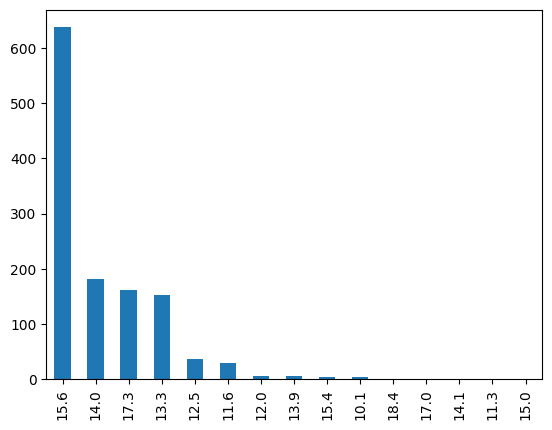

In [ ]:
df['Inches'].value_counts().plot(kind='bar')

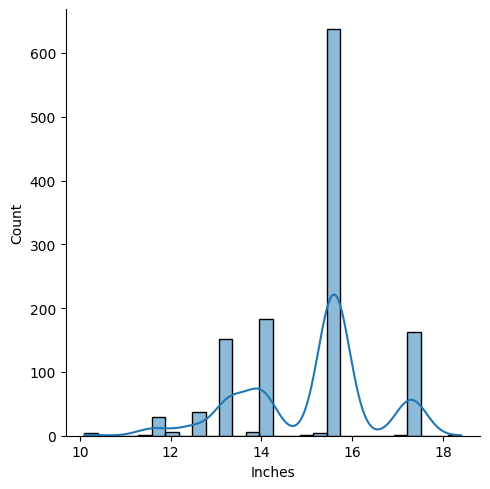

In [ ]:
sns.displot(df['Inches'],kde=True)
plt.show()

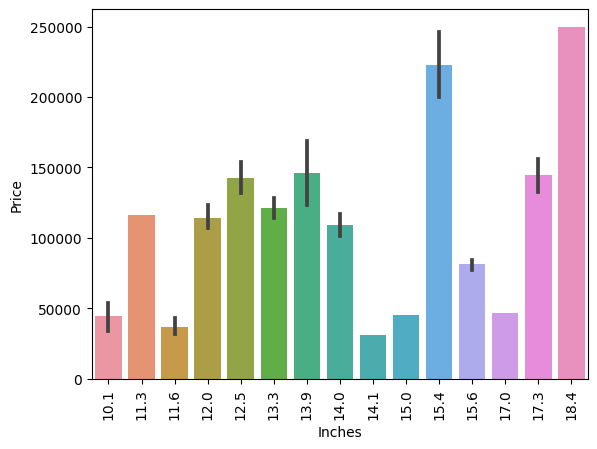

In [ ]:
sns.barplot(x=df['Inches'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Inches', ylabel='Price'>

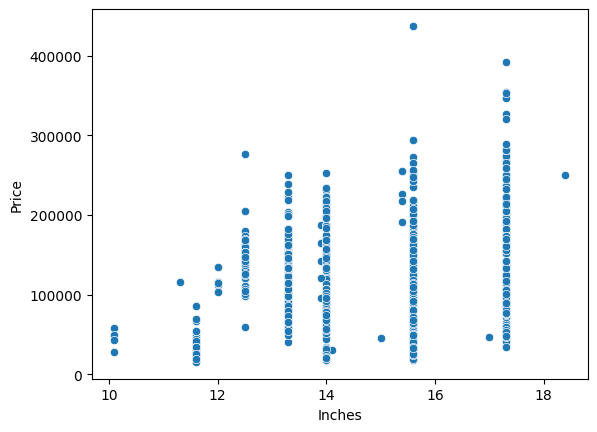

In [ ]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

In [ ]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
497,HP,Notebook,15.6,Touchscreen 1366x768,Intel Core i5 8250U 1.6GHz,4GB,1TB HDD,Intel UHD Graphics 620,Windows 10,2.04kg,46559


In [ ]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                492
1366x768                                         258
IPS Panel Full HD 1920x1080                      217
IPS Panel Full HD / Touchscreen 1920x1080         48
Full HD / Touchscreen 1920x1080                   45
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     10
4K Ultra HD / Touchscreen 3840x2160                8
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Touchscreen 1920x1200                    4
1440x900                                      

In [ ]:
# X_res
# Y_res
# Touchscreen
# IPS

In [ ]:
a="IPS Panel 4K Ultra HD / Touchscreen 3840x2160"

In [ ]:
a.split()

['IPS', 'Panel', '4K', 'Ultra', 'HD', '/', 'Touchscreen', '3840x2160']

In [ ]:
a.split()[-1]

'3840x2160'

In [ ]:
a.split()[-1].split('x')

['3840', '2160']

In [ ]:
a.split()[-1].split('x')[0]

'3840'

In [ ]:
a.split()[-1].split('x')[1]

'2160'

In [ ]:
(lambda a:a.split()[-1].split('x')[1])("IPS Panel 4K Ultra HD / Touchscreen 3840x2160")

'2160'

In [ ]:
df['X_res']=df['ScreenResolution'].apply(lambda a:a.split()[-1].split('x')[0]).astype('int')
df['Y_res']=df['ScreenResolution'].apply(lambda a:a.split()[-1].split('x')[1]).astype('int')

<ipython-input-49-40f364c1e3d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['X_res']=df['ScreenResolution'].apply(lambda a:a.split()[-1].split('x')[0]).astype('int')
<ipython-input-49-40f364c1e3d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Y_res']=df['ScreenResolution'].apply(lambda a:a.split()[-1].split('x')[1]).astype('int')


In [ ]:
df.sample(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res
97,HP,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,12GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.62kg,111515,1920,1080
734,Dell,Gaming,15.6,IPS Panel Touchscreen / 4K Ultra HD 3840x2160,Intel Core i7 6700HQ 2.6GHz,16GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.72kg,98122,3840,2160
1174,Dell,2 in 1 Convertible,15.0,Full HD / Touchscreen 1920x1080,Intel Core i3 7100U 2.4GHz,4GB,500GB HDD,Intel HD Graphics 620,Windows 10,2.08kg,45445,1920,1080


In [ ]:
a="IPS Panel 4K Ultra HD / Touchscreen 3840x2160"

In [ ]:
(lambda a:1 if "Touchscreen" in a else 0)("IPS Panel 4K Ultra HD / Touchscreen 3840x2160")

1

In [ ]:
df['Touchscreen']=df['ScreenResolution'].apply(lambda a:1 if "Touchscreen" in a else 0)
df['IPS']=df['ScreenResolution'].apply(lambda a:1 if "IPS" in a else 0)

<ipython-input-53-2c62828ec996>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Touchscreen']=df['ScreenResolution'].apply(lambda a:1 if "Touchscreen" in a else 0)
<ipython-input-53-2c62828ec996>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IPS']=df['ScreenResolution'].apply(lambda a:1 if "IPS" in a else 0)


In [ ]:
df.sample(15)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,Touchscreen,IPS
961,HP,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 6600U 2.6GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.43kg,129372,1920,1080,0,0
719,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.84kg,169638,1920,1080,0,0
713,Lenovo,Workstation,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7600U 2.8GHz,16GB,1TB SSD,Nvidia Quadro M520M,Windows 10,2.5kg,294546,3840,2160,0,1
239,HP,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4GB,500GB HDD,Intel UHD Graphics 620,Windows 10,1.49kg,60266,1920,1080,0,1
999,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.43kg,131157,1920,1080,0,0
200,Dell,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.2kg,129372,1920,1080,0,0
838,HP,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.28kg,151782,1920,1080,1,0
1164,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.9kg,174013,1920,1080,0,0
927,Dell,Gaming,17.3,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,32GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42kg,249994,1920,1080,0,0
528,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 10,1.86kg,35446,1920,1080,0,0


In [ ]:
df.drop(columns=['ScreenResolution'],inplace=True)

<ipython-input-55-5a8c076be408>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['ScreenResolution'],inplace=True)


In [ ]:
df.sample()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,Touchscreen,IPS
676,Acer,2 in 1 Convertible,13.3,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,89194,1920,1080,1,1


In [ ]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz     183
Intel Core i7 7700HQ 2.8GHz    142
Intel Core i7 7500U 2.7GHz     124
Intel Core i7 8550U 1.8GHz      71
Intel Core i5 8250U 1.6GHz      71
                              ... 
AMD E-Series E2-9000 2.2GHz      1
Intel Core M M3-6Y30 0.9GHz      1
Intel Core i5 2.9GHz             1
Intel Atom x5-Z8350 1.44GHz      1
AMD A9-Series 9410 2.9GHz        1
Name: Cpu, Length: 111, dtype: int64

In [ ]:
a="Intel Core i5 7200U 2.5GHz"

In [ ]:
a.split()

['Intel', 'Core', 'i5', '7200U', '2.5GHz']

In [ ]:
a.split()[0:3]

['Intel', 'Core', 'i5']

In [ ]:
" ".join(a.split()[0:3])

'Intel Core i5'

In [ ]:
(lambda a:" ".join(a.split()[0:3]))("Intel Core i5 7200U 2.5GHz")

'Intel Core i5'

In [ ]:
df['Cpu']=df['Cpu'].apply(lambda a:" ".join(a.split()[0:3]))

<ipython-input-63-a7ccd9163b7f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cpu']=df['Cpu'].apply(lambda a:" ".join(a.split()[0:3]))


In [ ]:
df['Cpu'].value_counts()

Intel Core i7               493
Intel Core i5               411
Intel Core i3               134
Intel Celeron Dual           66
Intel Pentium Quad           27
Intel Core M                 16
AMD A9-Series 9420           12
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Celeron Quad            5
Intel Atom x5-Z8550           4
AMD A8-Series 7410            4
Intel Pentium Dual            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9600P          2
Intel Xeon E3-1535M           2
AMD E-Series 7110             2
AMD A10-Series 9620P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
Intel Xeon E3-1505M           2
AMD E-Series E2-9000e         2
AMD E-Series 9000e            1
AMD Ryzen 1600                1
AMD E-Series 6110             1
AMD FX 9830P                  1
AMD E-Series E2-6110          1
AMD E-Series E2-9000          1
AMD A6-Series 7310            1
Intel Atom x5-Z8350           1
AMD A12-

In [ ]:
def fetch_processor(text):
    if text=="Intel Core i7" or text=="Intel Core i5" or text=="Intel Core i3" or text=="Intel Core M":
        return text
    elif text.split()[0]=="Intel":
        return " ".join(text.split()[0:2])
    else:
        if text[4]=="E":
            return "AMD E-Series"
        elif text[4]=="F":
            return "AMD F-Series"
        elif text[4]=="A":
            return "AMD A-Series"
        else:
            return "AMD Ryzen Series"

In [ ]:
df['Cpu']=df['Cpu'].apply(fetch_processor)

<ipython-input-66-e879aaac7dc4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cpu']=df['Cpu'].apply(fetch_processor)


In [ ]:
df['Cpu'].value_counts()

Intel Core i7       493
Intel Core i5       411
Intel Core i3       134
Intel Celeron        71
AMD A-Series         45
Intel Pentium        30
Intel Core M         16
AMD E-Series          9
Intel Atom            5
AMD Ryzen Series      4
Intel Xeon            4
AMD F-Series          2
Name: Cpu, dtype: int64

<Axes: >

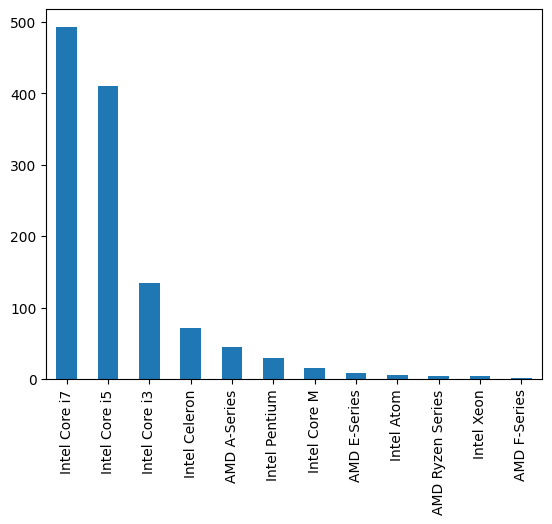

In [ ]:
df['Cpu'].value_counts().plot(kind='bar')

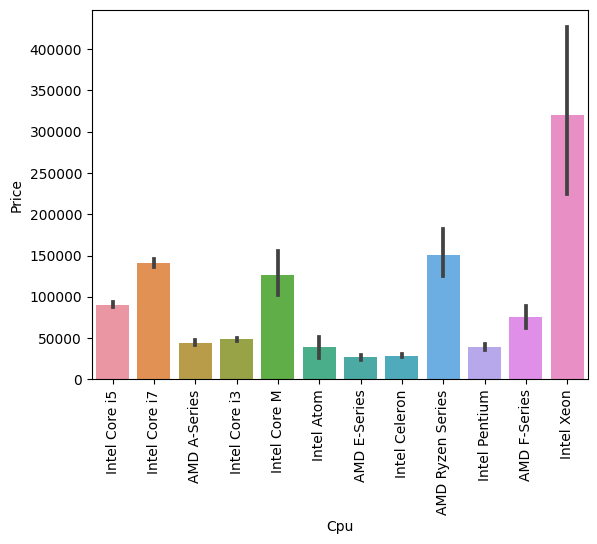

In [ ]:
sns.barplot(x=df['Cpu'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.sample(3)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,Touchscreen,IPS
64,Asus,Ultrabook,15.6,Intel Core i7,16GB,512GB SSD,Nvidia GeForce GTX 1050 Ti,Windows 10,1.8kg,177049,1920,1080,0,0
82,Acer,Notebook,15.6,AMD A-Series,4GB,1TB HDD,AMD Radeon R5,Windows 10,2.1kg,35267,1366,768,0,0
701,HP,Notebook,15.6,AMD A-Series,6GB,128GB SSD + 1TB HDD,AMD Radeon 520,Windows 10,2.1kg,58034,1920,1080,0,0


In [ ]:
df['Ram']

0        8GB
1        8GB
2        8GB
3       16GB
4        8GB
        ... 
1219     4GB
1220    16GB
1221     2GB
1222     6GB
1223     4GB
Name: Ram, Length: 1224, dtype: object

In [ ]:
a="16GB"
a.replace("GB","")

'16'

In [ ]:
(lambda a:a.replace("GB",""))("16GB")

'16'

In [ ]:
df['Ram']=df['Ram'].apply(lambda a:a.replace("GB","")).astype('int')

<ipython-input-74-31ec40dfd046>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ram']=df['Ram'].apply(lambda a:a.replace("GB","")).astype('int')


In [ ]:
df['Ram'].value_counts()

8     595
4     351
16    186
6      34
12     25
32     15
2      14
24      3
64      1
Name: Ram, dtype: int64

<Axes: >

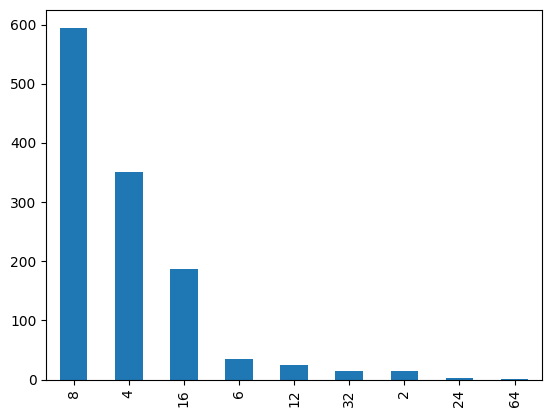

In [ ]:
df['Ram'].value_counts().plot(kind='bar')

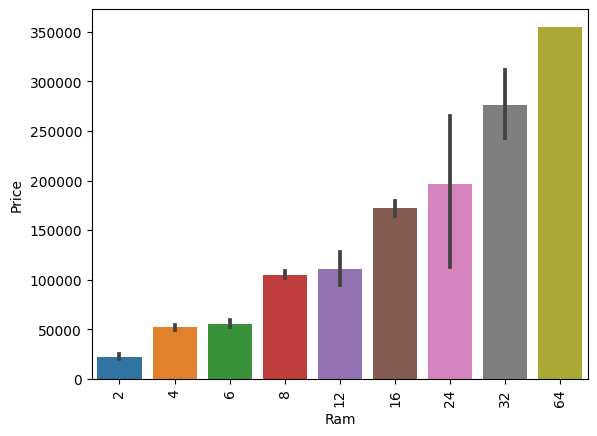

In [ ]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.sample()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,Touchscreen,IPS
513,Asus,Notebook,15.6,Intel Core i7,8,256GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2kg,115979,3840,2160,0,1


In [ ]:
df['Gpu'].value_counts()

Intel HD Graphics 620      265
Intel HD Graphics 520      179
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     65
Nvidia GeForce GTX 1060     45
                          ... 
Intel Graphics 620           1
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
Nvidia GeForce 960M          1
Name: Gpu, Length: 108, dtype: int64

In [ ]:
df['Gpu']=df['Gpu'].apply(lambda a:" ".join(a.split()[0:2]))

<ipython-input-80-837b199691d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gpu']=df['Gpu'].apply(lambda a:" ".join(a.split()[0:2]))


In [ ]:
df['Gpu'].value_counts()

Intel HD          586
Nvidia GeForce    353
AMD Radeon        166
Intel UHD          68
Nvidia Quadro      31
Intel Iris         11
AMD FirePro         5
AMD R4              1
Nvidia GTX          1
AMD R17M-M1-70      1
Intel Graphics      1
Name: Gpu, dtype: int64

<Axes: >

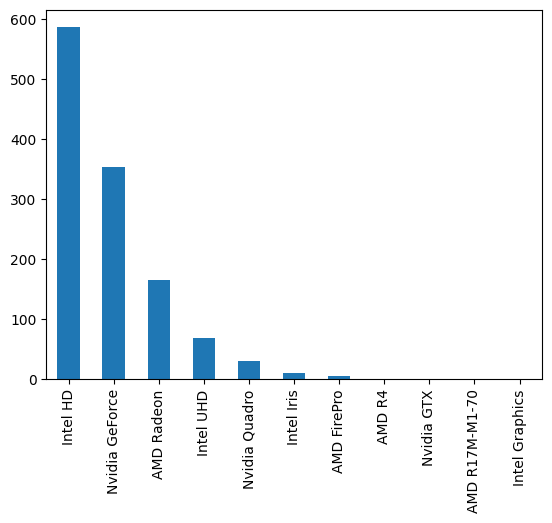

In [ ]:
df['Gpu'].value_counts().plot(kind='bar')

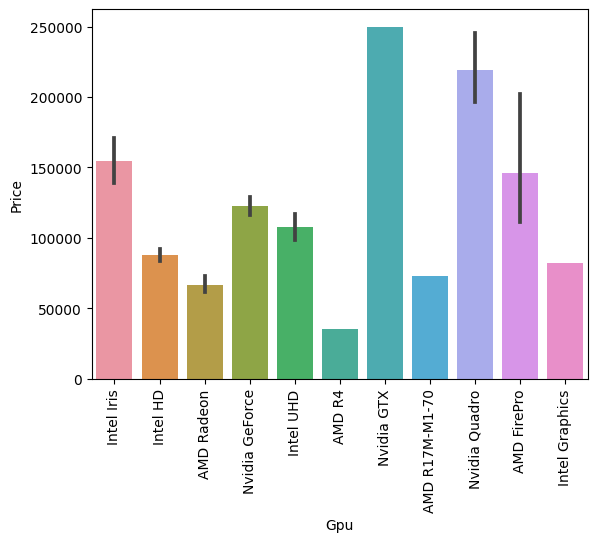

In [ ]:
sns.barplot(x=df['Gpu'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.sample()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,Touchscreen,IPS
236,Dell,Notebook,15.6,Intel Core i7,8,128GB SSD + 2TB HDD,AMD Radeon,Windows 10,2.2kg,87944,1920,1080,0,0


In [ ]:
df['OpSys'].value_counts()

Windows 10      1011
No OS             63
Linux             58
Windows 7         45
Chrome OS         22
macOS             13
Mac OS X           8
Android            2
Windows 10 S       2
Name: OpSys, dtype: int64

In [ ]:
def os(text):
    if text=="Windows 10" or text=="Windows 10 S":
        return "Windows 10"
    elif text=="Windows 7":
        return text
    elif text=="macOS" and text=="Mac OS X":
        return "MacOS"
    elif text=="No OS":
        return "No OS"
    else:
        return "Chrome OS/Linux/Android"

In [ ]:
df['OpSys']=df['OpSys'].apply(os)

<ipython-input-87-1a89346e0b11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OpSys']=df['OpSys'].apply(os)


In [ ]:
df['OpSys'].value_counts()

Windows 10                 1013
Chrome OS/Linux/Android     103
No OS                        63
Windows 7                    45
Name: OpSys, dtype: int64

<Axes: >

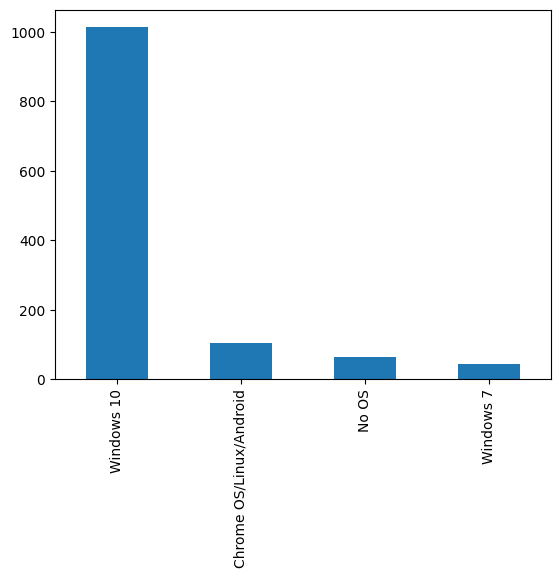

In [ ]:
df['OpSys'].value_counts().plot(kind='bar')

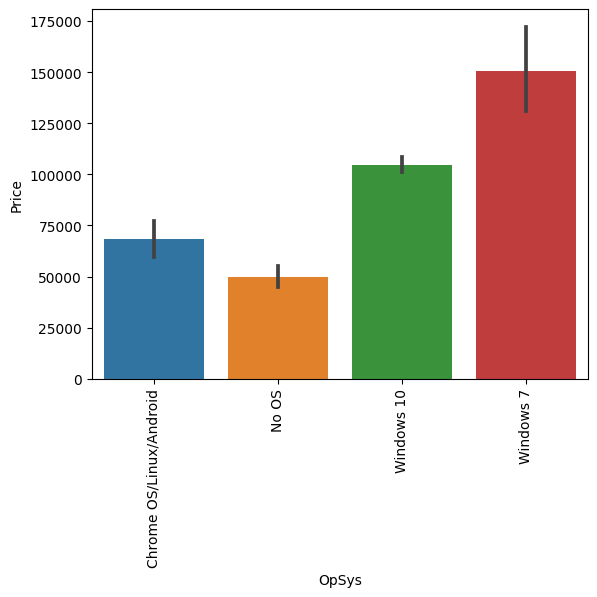

In [ ]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.sample()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,Touchscreen,IPS
41,Asus,Notebook,15.6,Intel Core i5,8,1TB HDD,Nvidia GeForce,Chrome OS/Linux/Android,2.3kg,46694,1366,768,0,0


In [ ]:
df['Weight']=df['Weight'].apply(lambda a:a.replace("kg","")).astype('float')

<ipython-input-92-8388be4cadc2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weight']=df['Weight'].apply(lambda a:a.replace("kg","")).astype('float')


In [ ]:
df['Weight'].describe()

count    1224.000000
mean        2.063204
std         0.663863
min         0.690000
25%         1.597500
50%         2.060000
75%         2.320000
max         4.700000
Name: Weight, dtype: float64

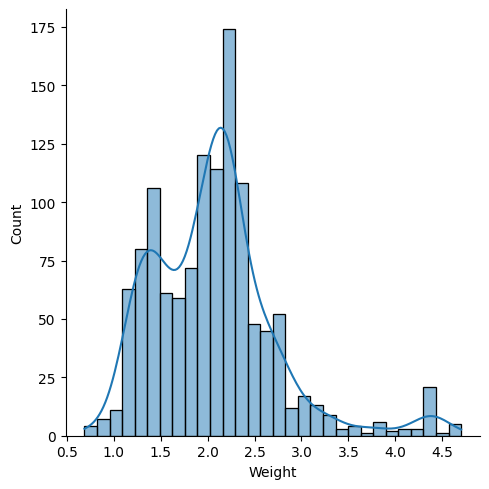

In [ ]:
sns.displot(df['Weight'],kde=True)
plt.show()

<Axes: xlabel='Weight', ylabel='Price'>

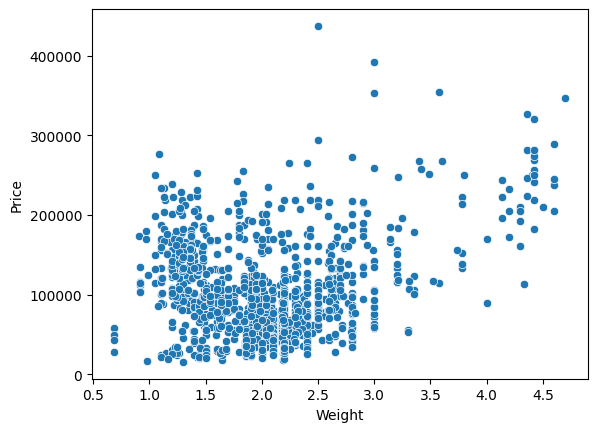

In [ ]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [ ]:
df.sample()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,Touchscreen,IPS
774,MSI,Gaming,17.3,Intel Core i7,16,512GB SSD + 1TB HDD,Nvidia GeForce,Windows 10,2.9,215619,1920,1080,0,0


In [ ]:
df['Memory'].value_counts()

256GB SSD                        393
1TB HDD                          214
500GB HDD                        124
512GB SSD                        105
128GB SSD +  1TB HDD              93
256GB SSD +  1TB HDD              73
128GB SSD                         71
32GB Flash Storage                29
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           12
64GB Flash Storage                10
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
1.0TB Hybrid                       7
16GB Flash Storage                 6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
32GB SSD                           2
256GB SSD +  256GB SSD             2
512GB SSD +  512GB SSD             1
5

In [ ]:
# SSD
# HDD
# SSD + HDD
# Flash Storage
# Hybrid
# SSD + SSD
# Flash Storage + HDD
# HDD + HDD
# SSD + Hybrid

# Due to the sheer complexity and different variants, we will delete the memory column

In [ ]:
df.drop(columns=['Memory'],inplace=True)

<ipython-input-99-8cab1fd6fcc0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Memory'],inplace=True)


In [ ]:
df.sample()

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,X_res,Y_res,Touchscreen,IPS
436,HP,Notebook,15.6,Intel Core i5,8,Intel HD,Windows 10,1.91,52588,1366,768,0,0


In [ ]:
df.corr(numeric_only=True)

,Inches,Ram,Weight,Price,X_res,Y_res,Touchscreen,IPS
Inches,1.000000,0.239155,0.824959,0.055330,-0.057739,-0.071772,-0.359497,-0.104090
Ram,0.239155,1.000000,0.394187,0.726639,0.415731,0.412278,0.094037,0.223322
Weight,0.824959,0.394187,1.000000,0.212038,-0.025155,-0.036765,-0.291506,0.038753
Price,0.055330,0.726639,0.212038,1.000000,0.553707,0.552964,0.161443,0.289225
X_res,-0.057739,0.415731,-0.025155,0.553707,1.000000,0.997454,0.320954,0.283969
Y_res,-0.071772,0.412278,-0.036765,0.552964,0.997454,1.000000,0.317174,0.294360
Touchscreen,-0.359497,0.094037,-0.291506,0.161443,0.320954,0.317174,1.000000,0.154500
IPS,-0.104090,0.223322,0.038753,0.289225,0.283969,0.294360,0.154500,1.000000


<Axes: >

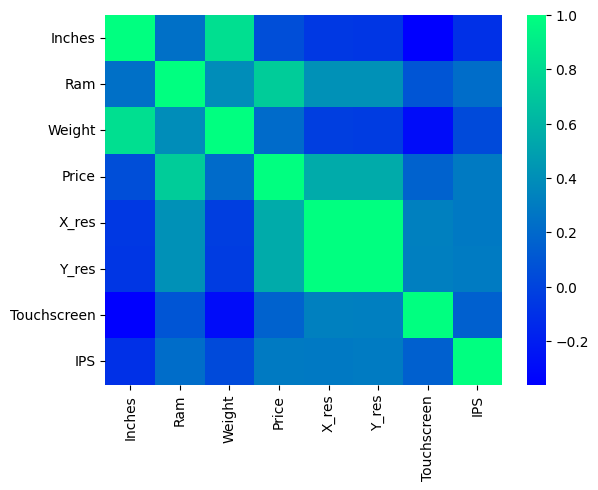

In [ ]:
sns.heatmap(df.corr(numeric_only=True),cmap="winter")

In [ ]:
df.corr(numeric_only=True)['Price']

Inches         0.055330
Ram            0.726639
Weight         0.212038
Price          1.000000
X_res          0.553707
Y_res          0.552964
Touchscreen    0.161443
IPS            0.289225
Name: Price, dtype: float64

In [ ]:
df.sample(2)

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,X_res,Y_res,Touchscreen,IPS
1014,Asus,Gaming,17.3,Intel Core i7,16,Nvidia GeForce,No OS,4.00,89105,1920,1080,0,1
587,Dell,Notebook,15.6,Intel Core i3,4,Intel HD,Chrome OS/Linux/Android,2.18,39633,1366,768,0,0


In [ ]:
# pixel density
df['ppi']=round(((df['X_res']**2)+(df['Y_res']**2))**0.5/df['Inches'],2)

<ipython-input-105-3138324f6b28>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ppi']=round(((df['X_res']**2)+(df['Y_res']**2))**0.5/df['Inches'],2)


In [ ]:
df.corr(numeric_only=True)['Price']

Inches         0.055330
Ram            0.726639
Weight         0.212038
Price          1.000000
X_res          0.553707
Y_res          0.552964
Touchscreen    0.161443
IPS            0.289225
ppi            0.483787
Name: Price, dtype: float64

In [ ]:
df.drop(columns=['X_res','Y_res','Inches'],inplace=True)

<ipython-input-107-d7ec33861cbb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['X_res','Y_res','Inches'],inplace=True)


In [ ]:
df['ppi'].value_counts()

141.21    419
100.45    195
127.34    131
157.35    122
165.63    100
111.94     42
135.09     28
176.23     25
276.05     25
282.42     23
106.11     22
209.80     18
125.37      9
117.83      8
331.26      7
226.98      6
226.42      6
254.67      5
127.68      4
224.17      4
158.48      4
220.53      4
169.78      2
220.84      2
316.97      2
352.47      2
90.58       2
119.72      1
189.91      1
107.99      1
111.14      1
194.95      1
234.98      1
146.86      1
Name: ppi, dtype: int64

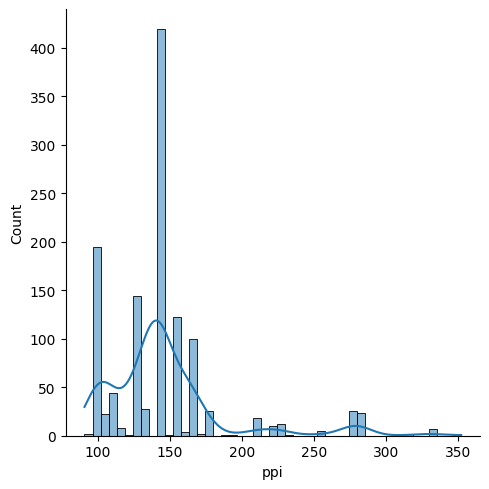

In [ ]:
sns.displot(x=df['ppi'],kde=True)

<Axes: xlabel='ppi', ylabel='Price'>

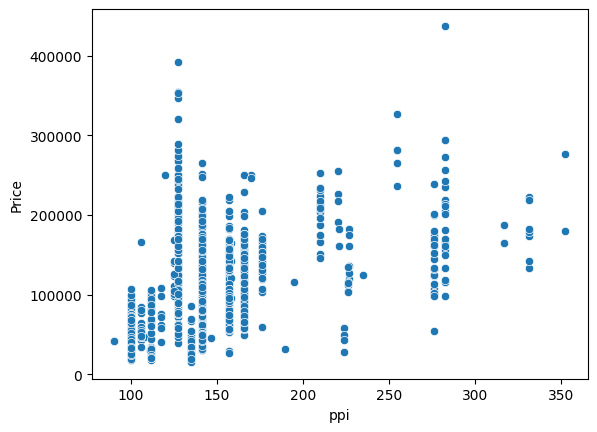

In [ ]:
sns.scatterplot(x=df['ppi'],y=df['Price'])

In [ ]:
df.sample()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi
1161,Asus,Notebook,Intel Core i7,16,Nvidia GeForce,Windows 10,2.2,156157,0,0,141.21


In [ ]:
df['Touchscreen'].value_counts()

0    1055
1     169
Name: Touchscreen, dtype: int64

<Axes: >

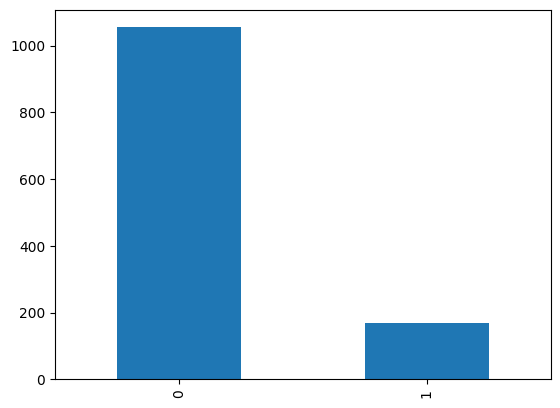

In [ ]:
df['Touchscreen'].value_counts().plot(kind='bar')

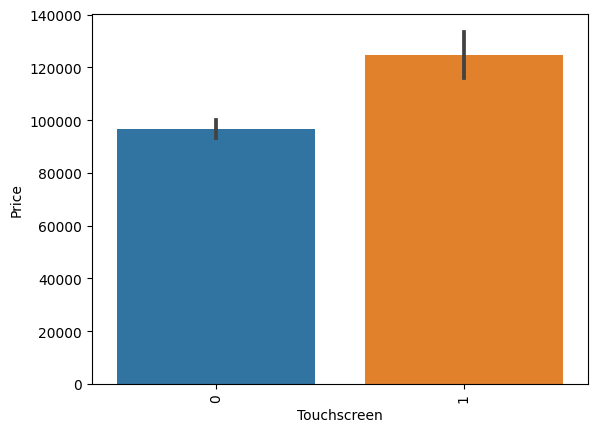

In [ ]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['IPS'].value_counts()

0    885
1    339
Name: IPS, dtype: int64

<Axes: >

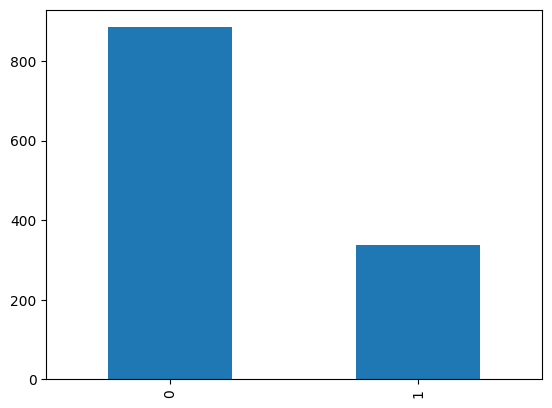

In [ ]:
df['IPS'].value_counts().plot(kind='bar')

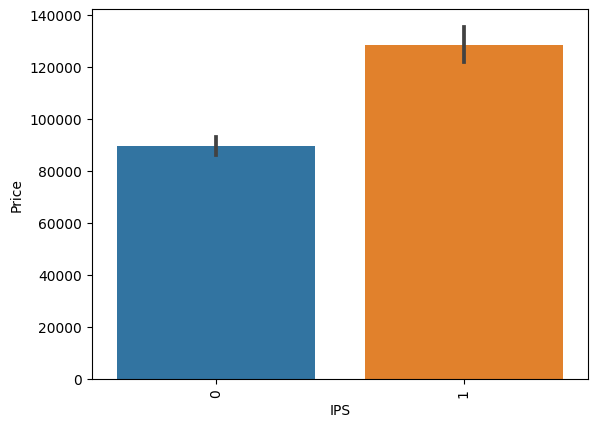

In [ ]:
sns.barplot(x=df['IPS'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.sample()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi
697,Dell,Notebook,Intel Core i5,8,AMD Radeon,Chrome OS/Linux/Android,2.32,52634,0,0,100.45


In [ ]:
df['Price'].describe()

count      1224.000000
mean     100406.710784
std       59806.561210
min       15535.000000
25%       54722.250000
50%       87408.000000
75%      131916.500000
max      437399.000000
Name: Price, dtype: float64

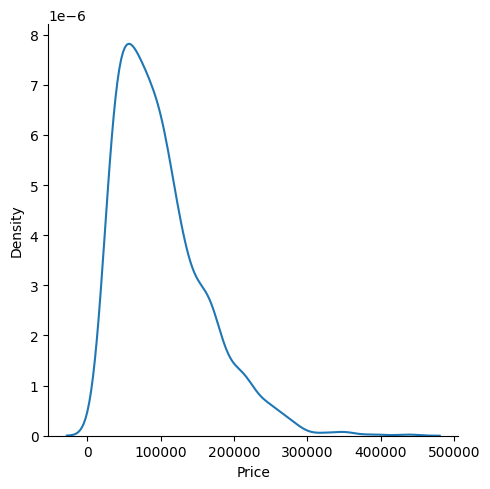

In [ ]:
sns.displot(df['Price'],kind='kde')

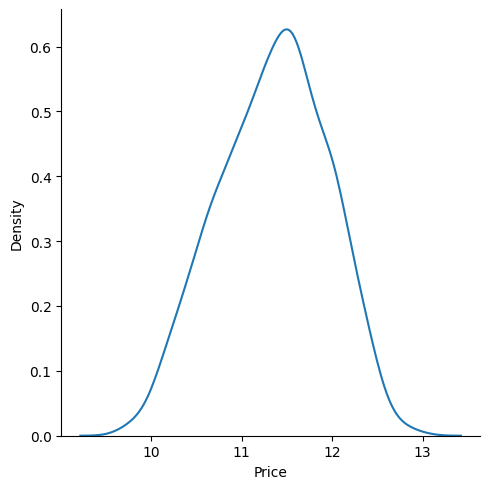

In [ ]:
sns.displot(np.log(df['Price']),kind='kde')

In [ ]:
df.sample()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi
1000,MSI,Gaming,Intel Core i7,16,Nvidia GeForce,Windows 10,3.78,138000,0,1,127.34


In [ ]:
X=df.drop(columns=['Price'])
y=np.log(df['Price'])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=13)

In [ ]:
X.shape

(1224, 10)

In [ ]:
X_train.shape

(1040, 10)

In [ ]:
X_test.shape

(184, 10)

In [ ]:
0.85*1224

1040.3999999999999

In [ ]:
X

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Touchscreen,IPS,ppi
0,Apple,Ultrabook,Intel Core i5,8,Intel Iris,Chrome OS/Linux/Android,1.37,0,1,226.98
1,Apple,Ultrabook,Intel Core i5,8,Intel HD,Chrome OS/Linux/Android,1.34,0,0,127.68
2,HP,Notebook,Intel Core i5,8,Intel HD,No OS,1.86,0,0,141.21
3,Apple,Ultrabook,Intel Core i7,16,AMD Radeon,Chrome OS/Linux/Android,1.83,0,1,220.53
4,Apple,Ultrabook,Intel Core i5,8,Intel Iris,Chrome OS/Linux/Android,1.37,0,1,226.98
...,...,...,...,...,...,...,...,...,...,...
1219,Lenovo,2 in 1 Convertible,Intel Core i7,4,Intel HD,Windows 10,1.80,1,1,157.35
1220,Lenovo,2 in 1 Convertible,Intel Core i7,16,Intel HD,Windows 10,1.30,1,1,276.05
1221,Lenovo,Notebook,Intel Celeron,2,Intel HD,Windows 10,1.50,0,0,111.94
1222,HP,Notebook,Intel Core i7,6,AMD Radeon,Windows 10,2.19,0,0,100.45


In [ ]:
X_train

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Touchscreen,IPS,ppi
682,Dell,Notebook,Intel Core i5,8,Intel HD,Chrome OS/Linux/Android,1.98,0,0,141.21
181,Dell,Notebook,Intel Core i7,16,Nvidia GeForce,Windows 10,2.06,1,0,282.42
761,Lenovo,2 in 1 Convertible,Intel Core i7,8,Intel HD,Windows 10,1.38,1,1,158.48
998,HP,Notebook,Intel Core i5,8,Intel HD,Windows 10,1.84,0,0,141.21
617,Acer,Notebook,Intel Core i3,4,Intel HD,Windows 10,2.40,0,0,100.45
...,...,...,...,...,...,...,...,...,...,...
866,HP,Ultrabook,Intel Core M,8,Intel HD,Windows 10,1.09,1,0,352.47
742,Acer,Notebook,Intel Core i3,4,Intel HD,Windows 10,1.80,0,1,157.35
74,Lenovo,Notebook,Intel Core i5,8,Intel HD,No OS,2.20,0,0,141.21
176,Dell,Notebook,Intel Core i7,16,AMD Radeon,Chrome OS/Linux/Android,2.02,0,0,141.21


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [ ]:
X_train.sample()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Touchscreen,IPS,ppi
1084,HP,Ultrabook,Intel Core i7,8,Intel HD,Windows 10,1.84,0,0,141.21


In [ ]:
X_test.sample()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Touchscreen,IPS,ppi
949,Asus,Notebook,Intel Core i5,8,Intel HD,Windows 10,1.4,0,0,276.05


In [ ]:
# LinearRegression
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=LinearRegression()
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print("R2 Score:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))

R2 Score: 0.8427602549987014
MAE: 0.20733053607895752
MSE: 0.06921651281942114


In [ ]:
# Lasso Regression
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=Lasso(alpha=0.0001)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print("R2 Score:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))

R2 Score: 0.841573411978544
MAE: 0.2086994887378086
MSE: 0.06973895792462459


In [ ]:
# Ridge Regression
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=Ridge(alpha=0.001)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print("R2 Score:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))

R2 Score: 0.84275998831904
MAE: 0.2073272509799408
MSE: 0.06921663021109083


In [ ]:
# KNeighborsRegressor
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=KNeighborsRegressor()
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print("R2 Score:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))

R2 Score: 0.8389028505276447
MAE: 0.20603307551685002
MSE: 0.07091453189226042


In [ ]:
# DecisionTreeRegressor
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=DecisionTreeRegressor(max_depth=12)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print("R2 Score:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))

R2 Score: 0.8242495866093563
MAE: 0.20481223511266164
MSE: 0.07736485925598255


In [ ]:
# SVR
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=SVR(C=10000)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print("R2 Score:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))

R2 Score: 0.8667385018575207
MAE: 0.18744076764375636
MSE: 0.058661353046826736


In [ ]:
# RandomForestRegressor
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=RandomForestRegressor(n_estimators=100)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print("R2 Score:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))

R2 Score: 0.8880375583580409
MAE: 0.17104775117986673
MSE: 0.049285565663696254


In [ ]:
# AdaBoostRegressor
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=AdaBoostRegressor()
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print("R2 Score:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))

R2 Score: 0.7937490844537805
MAE: 0.2454638483875981
MSE: 0.09079109826719926


In [ ]:
# XGBRegressor
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=XGBRegressor(n_estimators=30)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print("R2 Score:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))

R2 Score: 0.8912936689449227
MAE: 0.168221698472655
MSE: 0.0478522345413614


In [ ]:
# GradientBoostingRegressor
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=GradientBoostingRegressor(n_estimators=500)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print("R2 Score:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))

R2 Score: 0.8976278999560409
MAE: 0.1636311627446918
MSE: 0.04506392308754534


In [ ]:
import pickle
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [ ]:
!pip install streamlit --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 75.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.3 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import pickle
import numpy as np

df=pickle.load(open('df.pkl','rb'))
pipe=pickle.load(open('pipe.pkl','rb'))

st.title("Laptop Price Predictor")

company=st.selectbox("Manufacturer",df['Company'].unique(),index=4)
type=st.selectbox("Type of the laptop",df['TypeName'].unique(),index=1)
cpu=st.selectbox("Processor",df['Cpu'].unique(),index=0)
ram=st.selectbox("RAM(in GB)",[2,4,8,12,16,24,32,64,128],index=2)
gpu=st.selectbox('Graphics Card',df['Gpu'].unique(),index=1)
os=st.selectbox("Operating System",df['OpSys'].unique(),index=2)
weight=st.slider("Weight(in kg)",min_value=0.5,max_value=5.0,value=2.0,step=0.1)
touchscreen=st.selectbox("Does the laptop have touchscreen functionality?",['No','Yes'])
ips=st.selectbox("Does the laptop display have IPS Panel?",['No','Yes'],index=0)
screen_size=st.slider("Please state the screen size of the laptop(Measured diagonally).",
min_value=10.0,max_value=18.5,value=15.5,step=0.1)
screen_resolution=st.selectbox("Please mention the ScreenResolution of the same",
["2560x1600","1440x900","1920x1080","2880x1800","1366x768",
"2304x1440","3200x1800","1920x1200","2256x1504","3840x2160",
"2160x1440","2560x1440","1600x900","2736x1824","2400x1600"])
if st.button("PREDICT PRICE"):
    X_res=int(screen_resolution.split('x')[0])
    Y_res=int(screen_resolution.split('x')[1])
    ppi=round(((X_res**2)+(Y_res**2))**0.5/screen_size,2)
    if touchscreen=="No":
        touchscreen=0
    else:
        touchscreen=1
    if ips=="No":
        ips=0
    else:
        ips=1
    query=np.array([[company,type,cpu,ram,gpu,os,weight,touchscreen,ips,ppi]])
    op=pipe.predict(query)
    st.subheader("The laptop with above mentioned configuration will approximatey cost around ₹"+str(round(np.exp(op[0]))))

Writing app.py


In [ ]:
X_train.sample()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Touchscreen,IPS,ppi
1151,Lenovo,Notebook,Intel Core i7,8,Nvidia GeForce,No OS,2.2,0,0,100.45


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501



npx: installed 22 in 5.132s
your url is: https://light-snakes-decide.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.32.227.93:8501

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X doe